In [1]:
%matplotlib inline
print(__doc__)
import numpy as np
import pandas as pd
from time import time
from sklearn import manifold
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

all_events = pd.read_csv('C:/Users/Administrator/Dropbox/GDELT/all_events.csv').sort_values('SQLDATE', ascending=1)

Automatically created module for IPython interactive environment


In [2]:
X = all_events[['GoldsteinScale', 'AvgTone', 'QuadClass']].as_matrix()
y = all_events['EventRootCode'].as_matrix()

In [4]:
n_neighbors = 5
n_components = 2
color = y

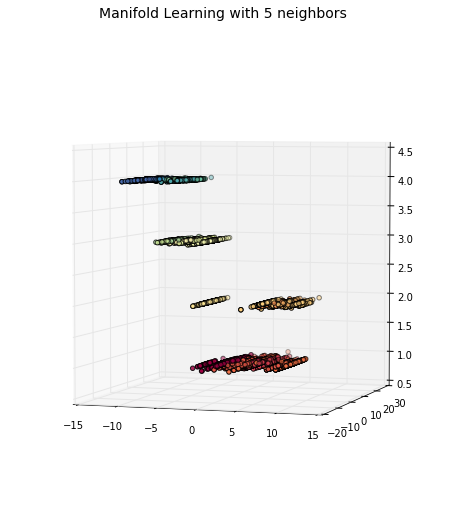

In [10]:
fig = plt.figure(figsize=(8, 8))
plt.suptitle("Manifold Learning with %i neighbors" %n_neighbors, fontsize=14)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)


In [ ]:
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')